In [ ]:
# 지도학습 - Label, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식. 
# Classification 은 지도학습의 대표. 기존 데이터가 어떤 레이블에 속하는지 패턴을 
# 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별.

In [ ]:
# Decision Tree - 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 Tree 기반의 분류 규칙을 만듬.
# if else식으로 트리를 타고 내려감. 많은 규칙이 있다는것은 복잡 == 과적합. 예측 성능이 저하됨.
# 가능한 한 적은 결정 노드로 높은 예측 정확도를가지려면, 데이터를 분류할 때 최대한 많은 데이터 세트가
# 해당분류에 속할 수 있또록, 결정노드의 규칙정해져야함!!

In [ ]:
# 엔트로피는 주어진 데이터 집합의 혼잡도를 의미. 서로 다른 값이 섞여있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다.
# 머신러닝에서는 지니 계수 (0에서 가장평등 1에서 가장 불평등), 정보이득계수가 높은 조건을 찾아서, 자식 트리 노드에걸쳐
# 반복적으로 분할

In [ ]:
# 결정트리의 가장 큰 장점은 '균일도' 라는 룰을 기반으로 하고 있어, 알고리즘이 쉽고 직관적이라는 점. 
# 또한 정보의 균일도만 신경쓰면 되므로, 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요없다.
# 과적합의 단점이 크다... (트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 도움이됨!)

In [ ]:
# 결정 트리의 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지, 시각적으로 보여줄 수 있는 방법 (Graphviz 사용)
# 파이썬으로 개발된 패키지가 아님. Wrapper 모듈을 별도로 설치하여 파이썬과 인터페이스 할 수 있도록함

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_tst, y_train, y_test = train_test_split(iris_data.data, iris_data.target,\
                                                  test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [5]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names= iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

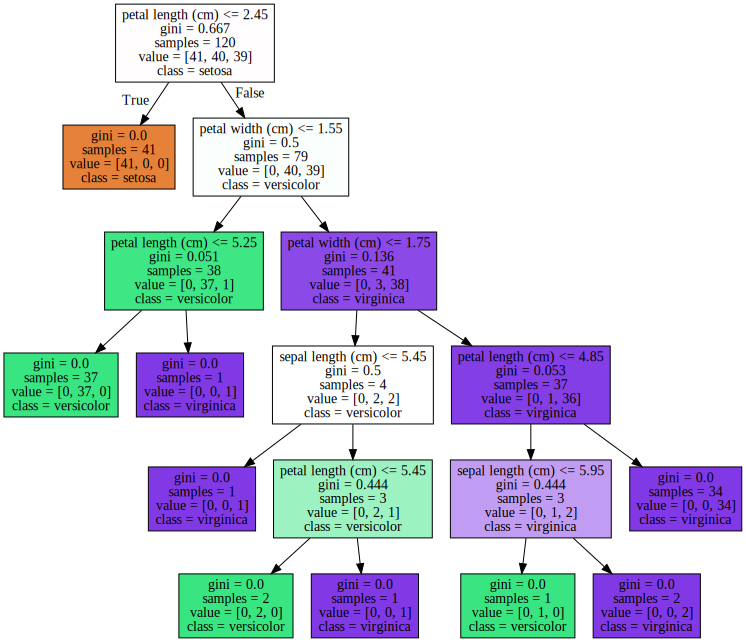

In [11]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


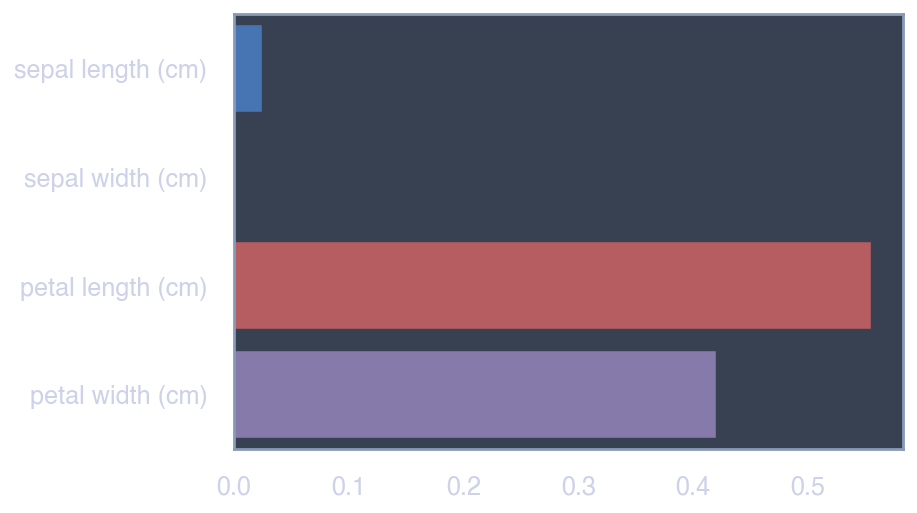

In [13]:
# 결정 트리는 균일도 기반하여 어떠한 속성을 규칙조건으로 선택하느냐가 중요한 요건!
# 피처의 중요한 역할 지표를 feature_importances_ 속성으로 제공한다!
# feature별로 중요도 값을 매핑하고 막대그래프로 표현해보자
from jupyterthemes import jtplot
jtplot.style(theme="oceans16", context="notebook", ticks=True, grid=False)

import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))
    

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y = iris_data.feature_names)

In [ ]:
# petal length가 가장 중요하다!

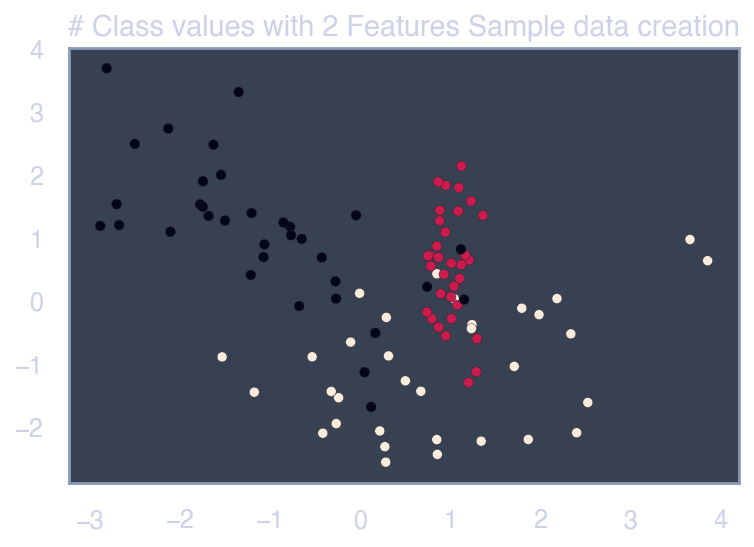

In [17]:
# Overfitting 
# Decision_Tree 의 과적합 문제를 시각화 해보자. 
# make_classification() 사용하여 테스트용 데이터를 쉽게 만들어 보자

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("# Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant = 0, n_informative = 2, \
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker="o", c=y_labels, s=25, edgecolor='k')

In [20]:
# 각 feature가 X, Y축으로 나열된 2차원 그래프, 3개의 클래스 값 구분은 색깔별로!!ㅎㅎ.
# 1. F_features와 y_labels 데이터 세트를 기반으로 결정 트리를 학습하겠다. 첫번쨰 학습시, 결정트리 생성에 별다른 제약이 없도록
# 하이퍼 패러미터를 디폴트로 하고, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인
# visualize_boundary()를 생성할거다. 

In [21]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

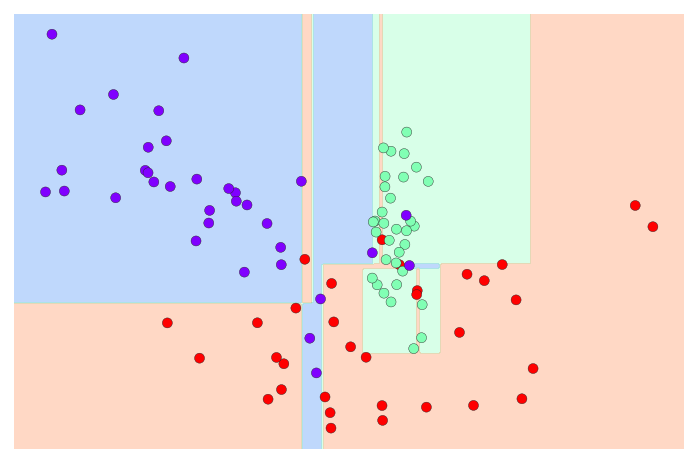

In [22]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

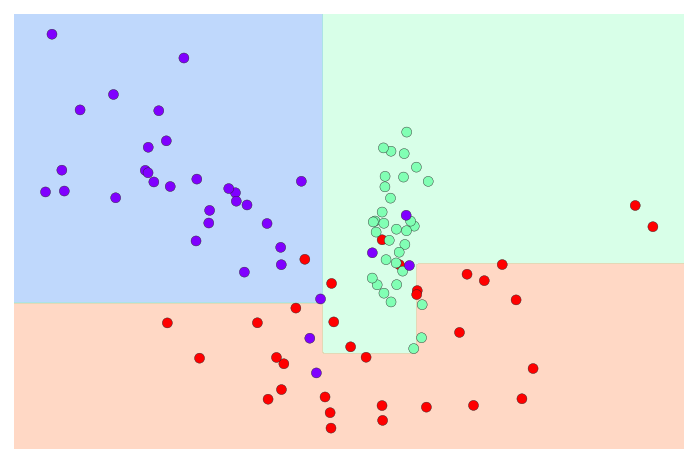

In [26]:
# 빨간범위 안에 보라색점, 초록범위에 빨간점등 다른위치에 있는것들이 Outlier들인데... 경계가 너무 많이 생겼다. 이렇게 복잡한
#model은 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 매우 떨어지게 된다.

# min_samples_leaf = 6을 설정해 어떻게 기준선이 변하는지 봅시다.
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
# 너무 학습에 취중되도록 만드는것은 좋지않다!! 이렇게 하니 훨씬 깔끔하고 예측도 잘할것.

In [ ]:
# Human Activity Recognition 데이터 세트에 대한 예측 분류를 해봅시다. 
# 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러가지 피처를 수집한 데이터
# 어떠한 동작을 하는지 예측해보자 

In [28]:
# feature들을 먼저 살펴보자

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv("human_activity/features.txt", sep="\s+", \
                             header=None, names=["column_index", "column_name"])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print("전체 피처명에서 10개만 추출", feature_name[:10])

전체 피처명에서 10개만 추출 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [63]:
# 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z축 값으로 돼 있음을 알 수 있다. 

# train directory에 있는 학습용 피처 데이터 세트와 레이블 데이터 세트, test에있는
# 테스트용 피처 데이터 파일과 레이블 데이터 파일을 각각 학습/테스트용 DF로 로드하자.

import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('human_activity/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [64]:
print("##학습 피처 데이터셋 info()")
print(X_train.info())

##학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [31]:
# 7352개의 row, 561개의 피처;;;. 피처가 전부 float형태이므로 카테고리 인코딩은 필요가 없다.

# 레이블 값은 1,2,3,4,5,6 의 6개 값이고 분포도는 특정 값으로 왜곡되지않고 비교적 고르게 분포
print(y_train["action"].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [32]:
# Decision_Tree_Classifier를 이용해 동작 예측 분류를 수행해보자
# hyper_parameter는 모두 디폴트 값으로 설정

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정 트리 예측 정확도: {0:.4f}".format(accuracy))

# DecisionTreeClassifier 의 하이퍼 파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼 파라미터:\n",\
      dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [61]:
# GridSearchCV를 이용해, max_depth값을 변화 시키면서 예측 성능 확인해봅시다. k_fold_validation = 5set

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'\
      .format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.6min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [51]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.688511,0.079380,0.004441,0.001582,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,0.881633,0.850791,0.028313,5
1,2.124059,0.062258,0.003469,0.000522,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,3
2,2.445410,0.056354,0.003182,0.000155,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,0.887755,0.851209,0.037707,2
3,2.831226,0.167857,0.003509,0.000196,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,0.886395,0.844135,0.035598,7
4,3.080333,0.217323,0.003413,0.000532,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,0.897959,0.851344,0.038140,1
5,3.072342,0.295185,0.003262,0.000224,20,{'max_depth': 20},0.802855,0.818491,0.856463,0.877551,0.898639,0.850800,0.035718,4
6,3.129221,0.287678,0.003341,0.000256,24,{'max_depth': 24},0.796057,0.818491,0.856463,0.877551,0.898639,0.849440,0.037597,6


In [58]:
a = pd.DataFrame(grid_cv.cv_results_)
a

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.688511,0.079380,0.004441,0.001582,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,0.881633,0.850791,0.028313,5
1,2.124059,0.062258,0.003469,0.000522,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,3
2,2.445410,0.056354,0.003182,0.000155,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,0.887755,0.851209,0.037707,2
3,2.831226,0.167857,0.003509,0.000196,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,0.886395,0.844135,0.035598,7
4,3.080333,0.217323,0.003413,0.000532,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,0.897959,0.851344,0.038140,1
5,3.072342,0.295185,0.003262,0.000224,20,{'max_depth': 20},0.802855,0.818491,0.856463,0.877551,0.898639,0.850800,0.035718,4
6,3.129221,0.287678,0.003341,0.000256,24,{'max_depth': 24},0.796057,0.818491,0.856463,0.877551,0.898639,0.849440,0.037597,6


In [67]:
# 5개의 CV세트에서 max_depth 값에 따라 어떻게 예측 성능이 변했는지 GridSearchCV 객체의 cv_results_ 속성을 통해 살펴봅시다.

#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그떄의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [70]:
#max_depth 가 16일떄 가장 좋은 결과가 나온다.

max_depths = [6, 8, 10, 12, 16, 20, 24]

#max_depth 값을 변화시키면서 그떄마다 학습과 테스트 세트에서의 예측 성능 측정

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("max_depth = {0}, 정확도:{1:.4f}".format(depth, accuracy))

max_depth = 6, 정확도:0.8558
max_depth = 8, 정확도:0.8707
max_depth = 10, 정확도:0.8673
max_depth = 12, 정확도:0.8646
max_depth = 16, 정확도:0.8575
max_depth = 20, 정확도:0.8548
max_depth = 24, 정확도:0.8548


In [71]:
# max_depth가 8일경우 가장 높음. 그리고 이후로는 수치가 점점 떨어짐. 과적합이기 때문. simple is the best!

#max_depth와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝해보자
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [72]:
# max 8, min 16일때 가장 높은 정확도를 보여주었다. 이를 이용해 예측 수행하자
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


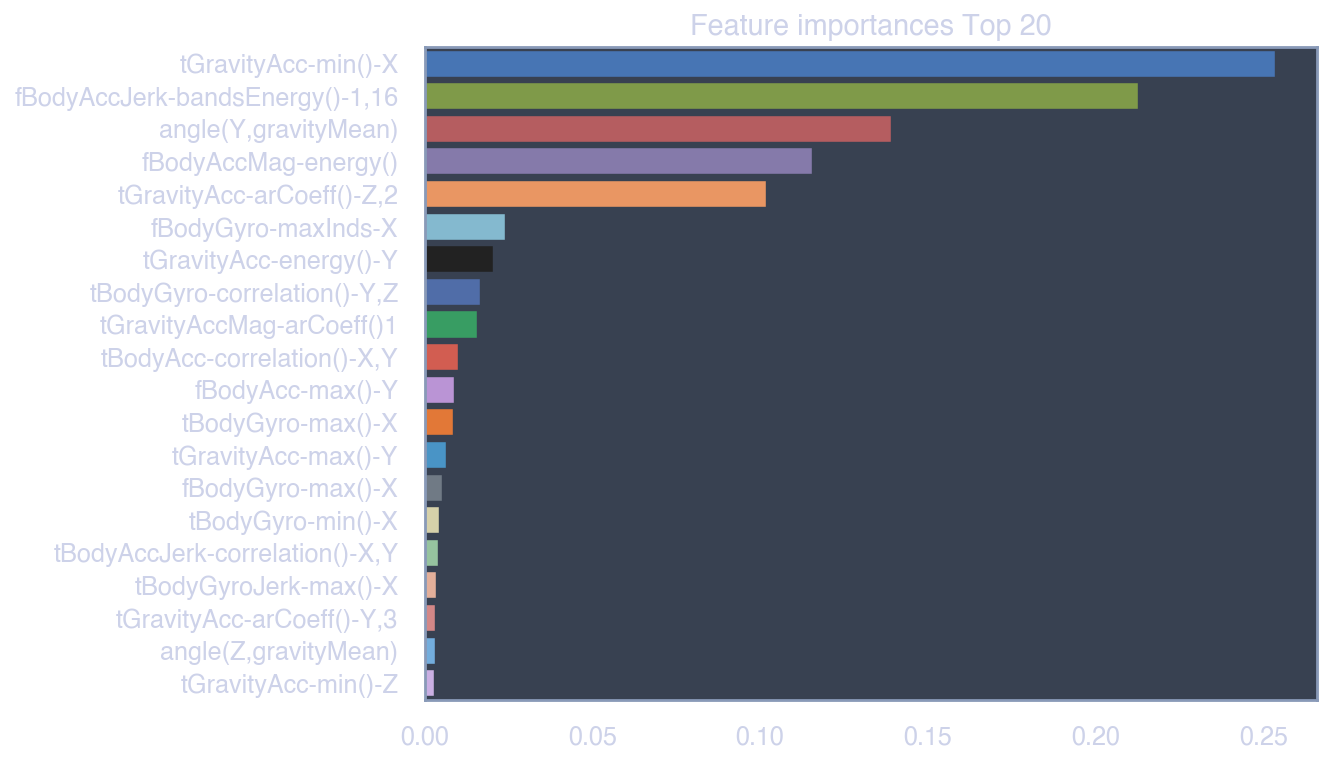

In [73]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()